# E-Commerce Customer Segmentation Using K-Means Clustering 
## Context:
    
   In our world today, understanding customer bahaviour and categorising them based on their demography and buying behaviour is very crucial. 
This is because it allows a business know how to prioritize resource distribution. 
It also allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

## Objective: 
   This projects purpose is to demonstrate the concept of segmentation of a customer dataset from an e-commerce site using k-means clustering. 

## Dataset Details:
   The dataset contains the annual income (in 000) of 303 customers and their total spend (in 000) on an e-commerce site for a period of one year.

## 1. Libraries

In [197]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Algorithms
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Reading The Data

In [219]:
seg =pd.read_csv('IncomeSpend.csv')

## 2.1. An Overview of the Data

In [4]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [5]:
seg.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


## 2.2 Visualize Relationships

Text(0.5, 0, 'Income / spend')

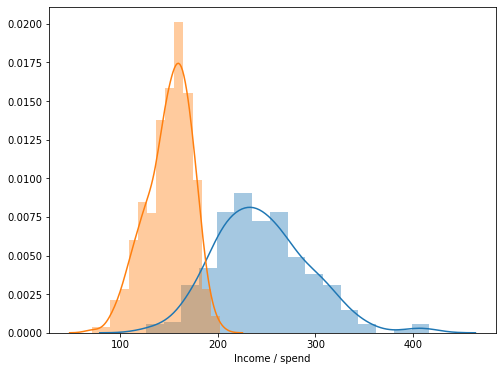

In [26]:
plt.figure(figsize=(8,6))
plt_income = sns.distplot(seg["INCOME"])
plt_spend = sns.distplot(seg["SPEND"])
plt.xlabel('Income / spend')

In [ ]:
#There is a normal distribution of data in this dataset

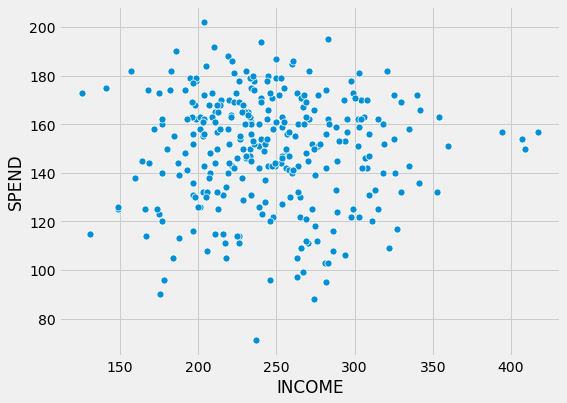

In [168]:
plt.figure(figsize=(8,6))
sns.scatterplot("INCOME","SPEND",s=50,data=seg)

In [ ]:
#The values in both variables are not correlated.

## 3. Customer Segmentation

This involves dividing customers into groups based on certain criteria. The idea is to find relationships within variables in 
other to predict customer behaviour. 

In this project, we will use K-Means clustering algorithm to split our datapoints into clusters. This is an unsupervised
machine learning technique, where there are no defined dependent and independent variables. The patterns in the data are used to identify/group similar observations.

The objective of clustering algorithm is to ensure that the distance between datapoints in a cluster is very low compared to the distance between two clusters. In other words, members of a group are very similar and members of different groups are extremely dissimilar.

## 3.1. K-Means Clustering

In [214]:
#Instatiate Model with 6 clusters
kmeans = KMeans(init="k-means++",n_clusters=6,n_init=50,max_iter=500,random_state=42)

In [215]:
#Fit Model
kmeans.fit(seg)

KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

In [216]:
#Evaluate Model using silhouette_score
predicted_labels = kmeans.labels_

silhouette_score(seg, predicted_labels)

A silhouette score of 0.37 indicates that there is some overlap among clusters

0.36954422037083634

## 3.2 Elbow Method

There is a need to tell how many clusters i need to K-means algorithm. To find this out, I will apply the Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia

In [ ]:
# Sum of the squared error (SSE) 

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) 
The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. 
Since this is a measure of error, the objective of k-means is to try to minimize this value.

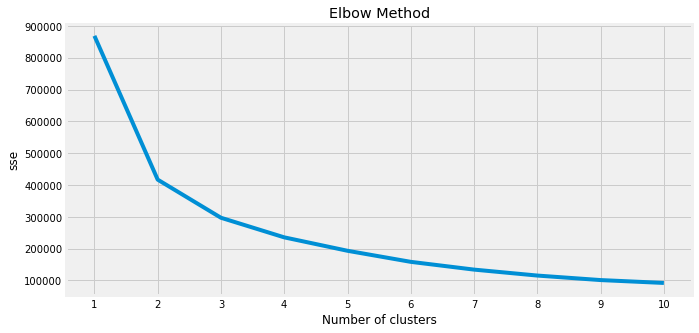

In [217]:
# This involves running several k-means and incrementing k with each iteration, and recording the SSE.
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}

# Create list to hold the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(seg)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11),sse)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()



In [ ]:
It looks like 4 is the optimal number of clusters. Based on business requirements, I can go ahead with less or more clusters.
In this case, ill be selecting 6 clusters

## 3.3. Visualize Data Along With Clustered Labels

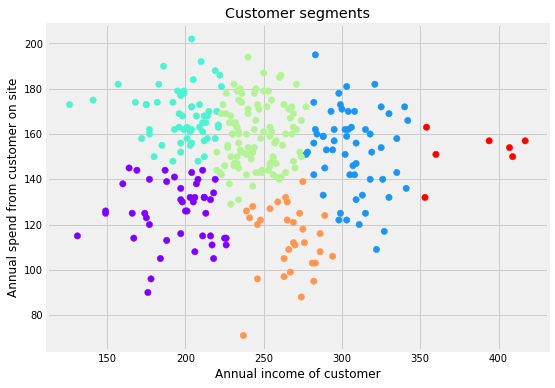

In [218]:
plt.figure(figsize=(8, 6))
plt.scatter(seg['INCOME'],seg['SPEND'], c=predicted_labels,cmap='rainbow', s=40)
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.show()

### 3.4. Key Insights

1. From the analysis we can conclude that there are 6 segments in this dataset. We can interpret them as follows:

    Cluster 1(Teal)- Customers with low annual income and high annual spend
    
    Cluster 2(Purple)- Customers with low annual income and low to medium annual spend
    
    Cluster 3(Green)- Customers with medium annual income and high annual spend
    
    Cluster 4(Orange)- Customers with medium annual income and low annual spend
    
    Cluster 5(Blue)- Customers with medium to high annual income and midium to high annual spend
    
    Cluster 6(Red)- Customers with high annual income and mid to high annual spend
    

### 3.5. Possible Strategies:

1. A typical strategy would be to focus certain promotional efforts on the high value customers in Cluster 5 and 6. 

    
2. Cluster 1 is a unique customer segment. Despite the fact that they earn relatively lower annual income, 
   these customers tend to spend more on the e-commerce site, indicating their loyalty. 
   A marketing strategy for this group could be offering some discounted pricing based promotional campaign to retain them.
   
    
3. Customers in cluster 2 are most likely price sensitive shoppers. These shoppers look for the fairest price possible. 
   They would most likely scan through other websites to ensure they get the best deal. What this means is that they will be
   super savvy and very informed on the features of products on offer. A marketing strategy to target these customers could be
   to help them understand why investing in your product is money well spent. 
   
    
4. Customers in cluster 4 will need to be analyzed to understand why despite the fact that they earn mid to high income,
   they do not spend much on the site. The company could look into previous transactions with these customers to find out 
   how satisfied they were with it. 